Assignment 2 by Biraveen, Ha, Yusuf, Shoaib
```



                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2010-06-29    3.800000    5.000000  ...    4.778000  93831500
2010-06-30    5.158000    6.084000  ...    4.766000  85935500
2010-07-01    5.000000    5.184000  ...    4.392000  41094000
2010-07-02    4.600000    4.620000  ...    3.840000  25699000
2010-07-06    4.000000    4.000000  ...    3.222000  34334500
...                ...         ...  ...         ...       ...
2021-10-07  785.460022  805.000000  ...  793.609985  19195800
2021-10-08  796.210022  796.380005  ...  785.489990  16711100
2021-10-11  787.650024  801.239990  ...  791.940002  14200300
2021-10-12  800.929993  812.320007  ...  805.719971  22020000
2021-10-13  810.469971  815.409973  ...  811.080017  14120100

[2844 rows x 6 columns]


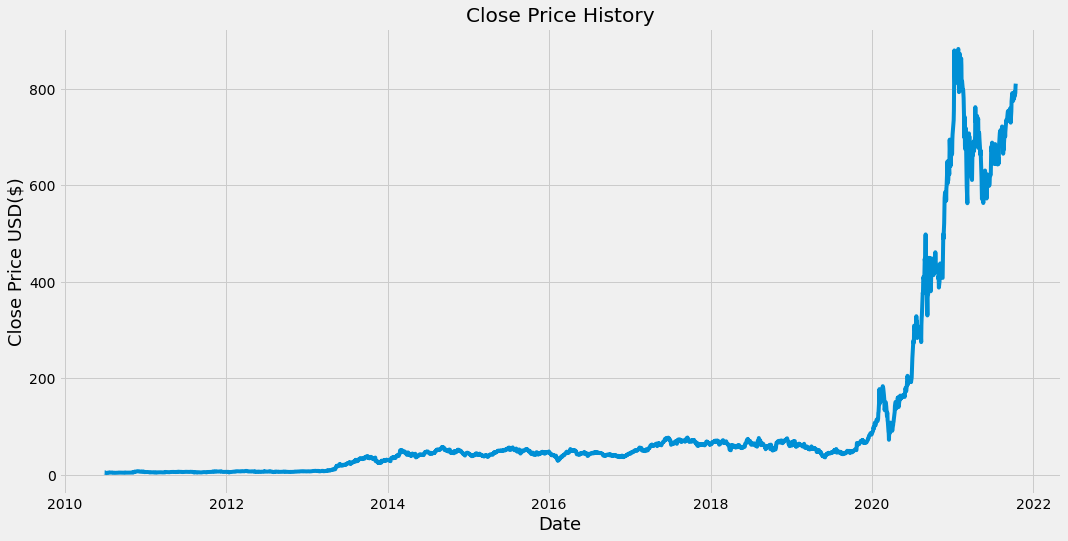

[array([1.83878257e-03, 1.82514513e-03, 1.40011133e-03, 7.72788721e-04,
       7.04601481e-05, 0.00000000e+00, 3.77302728e-04, 3.63665280e-04,
       2.84113500e-04, 5.31860473e-04, 9.18254833e-04, 9.29619373e-04,
       1.10008747e-03, 1.38874679e-03, 1.02280860e-03, 1.00462534e-03,
       1.18191216e-03, 1.24782649e-03, 1.17054762e-03, 1.07963130e-03,
       1.11827074e-03, 1.03417314e-03, 9.40983913e-04, 1.16372890e-03,
       1.39783842e-03, 1.24100777e-03, 1.05690222e-03, 8.61432133e-04,
       8.63705041e-04, 7.34149285e-04, 4.77310681e-04, 4.09123440e-04,
       5.72772817e-04, 6.77326585e-04, 7.61424181e-04, 6.75053677e-04,
       6.79599493e-04, 7.50059641e-04, 9.84169165e-04, 7.72788721e-04,
       9.31892281e-04, 8.97798661e-04, 8.86434121e-04, 9.25073557e-04,
       8.36430145e-04, 1.05690222e-03, 1.19554961e-03, 1.19327670e-03,
       1.07735839e-03, 1.15918308e-03, 1.11599783e-03, 9.93260797e-04,
       1.11827074e-03, 1.20918706e-03, 1.40465715e-03, 1.16827471e-03,
     

(2073, 60, 1)

In [ ]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import io
import pandas
from datetime import datetime
import requests
#workaround since the normal way dont work for some
class YahooData:
  def fetch(ticker, start, end):
    headers = {
        'User-Agent': 'workaround'
    }

    url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
    x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
    y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
    url += "?period1=" + str(x) + "&period2=" + str(y) + "&interval=1d&events=history&includeAdjustedClose=true"
    
    r = requests.get(url, headers=headers)
    pd = pandas.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)

    return pd


df = YahooData.fetch("TSLA", start="2000-01-01", end="2021-10-14")
print(df)

#just to print the number of columms and rows
df.shape 

#graph
#visualizing the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize= 18)
plt.show()


#creating new datafram eith just the "close"-colum
data = df.filter(['Close'])

#converting datafrma to numpy array 

dataset = data.values

#now to train our model based on rows
training_data_length = math.ceil(len(dataset)* .75) #using math function to round up 

training_data_length
#datascaling (important to do before giving it to a neural network)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) #transform data based on min and max 

scaled_data #it does display everything if i dont run the code under. it will still run if there is code under it, but wont display it 

# Creating traning dataset and the scal(ing/ed) training dataset 
Data_trainer = scaled_data[0: training_data_length, :]

#now we split adta into x and y train
x_train = [] #independent traning vaiables
y_train = [] #target variables

#append the alst 60 values
for i in range(60,len(Data_trainer)):
  x_train.append(Data_trainer[i-60:i, 0])
  y_train.append(Data_trainer[i, 0])
  if i <= 61:
    print(x_train) #will contain the last 60 values
    print(y_train) #will contain the 61 value
    print()

#converting the x and y trian to numpy arrays to train the lstm model
x_train, y_train = np.array(x_train), np.array(y_train)

#reshaping the data from 2D to 3D
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape



In [ ]:
#building LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compling model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
#model traning
model.fit(x_train,y_train, batch_size = 1, epochs=1)

2073/2073 [==============================] - 56s 26ms/step - loss: 2.8864e-05


In [ ]:
#now we create testing dataset by creating a new arrat that contains scaled values.
test_data = scaled_data[training_data_length - 60: , : ]
#createing  data sets x_test and y_test
x_test= []
y_test = dataset[training_data_length:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])




In [ ]:
#convert data to numpt array
x_test = np.array(x_test)


In [ ]:
#data reshaping
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#model prediction for x_test dataset
guess_predictions = model.predict(x_test)
guess_predictions = scaler.inverse_transform(guess_predictions) #kind of unscaling the values
#want predictions to contain same values as y_dataset

In [ ]:
#model evaluation by (RMSE) this is for model accuracy (prediction percantage score)
RMSE = np.sqrt(np.mean (guess_predictions - y_test)**2 )
RMSE 

45.31532619408081

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


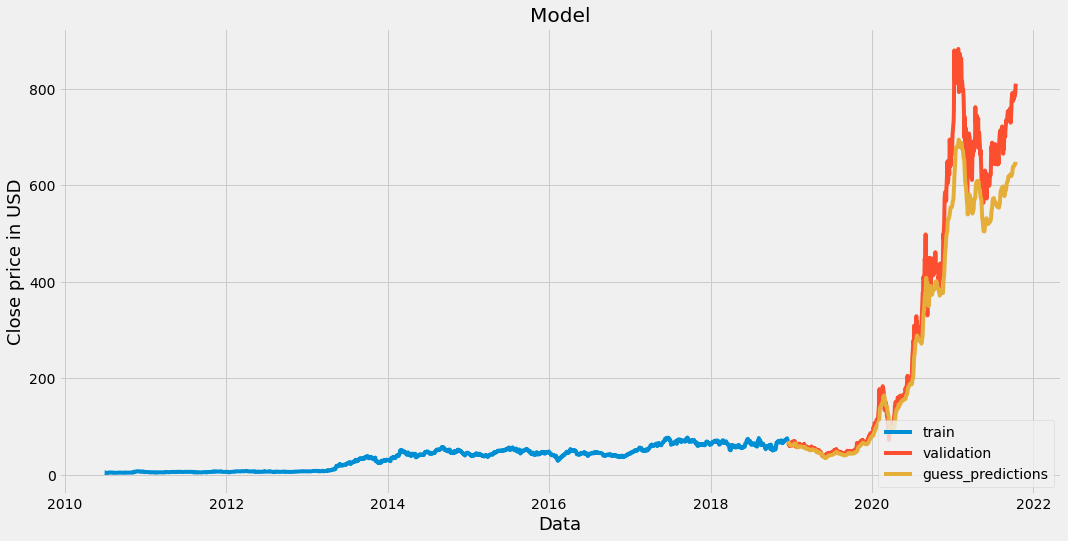

In [ ]:
#now we plot data 
train = data[:training_data_length]
validation = data[training_data_length:]
validation['guess_predictions'] = guess_predictions
#now we visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close price in USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(validation[['Close', 'guess_predictions']])
plt.legend(['train','validation', 'guess_predictions'], loc = 'lower right')
plt.show()
#blue = the training, orange=actual closing price, yellow = predctions

In [ ]:
#here im going to show the preditcted price and actual price, 
validation

,Close,guess_predictions
Date,,
2018-12-18,67.405998,68.895477
2018-12-19,66.594002,67.935890
2018-12-20,63.076000,66.789917
2018-12-21,63.953999,65.231613
2018-12-24,59.077999,63.880882
...,...,...
2021-10-07,793.609985,641.642700
2021-10-08,785.489990,643.600464
2021-10-11,791.940002,644.608521


In [ ]:
#trying to predict closing price for tesla stocks for 2021-11-14
#start by getting qoute
TSLA_quote = YahooData.fetch("TSLA", start="2000-01-01", end="2021-10-14")
#creating new datafram 
new_df = TSLA_quote.filter(['Close'])
#turning the last 60 day closing price values and converting the dataframe to an array
last_60_days = new_df[-60:].values
#datascaling to have vaues between 0 and 1
last60daysscaled= scaler.transform(last_60_days)
#creating empty list
x1_test = [] #not the same as the one i used before
#appending the last 60 days
x1_test.append(last60daysscaled)
#converting x1_test dataset to a numpy array 
x1_test = np.array(x1_test)
#data reshaping
x1_test = np.reshape(x1_test, (x1_test.shape[0], x1_test.shape[1], 1))
#getting the preditcted scale price
pred_price1 = model.predict(x1_test)
#undo scaling
pred_price1 = scaler.inverse_transform(pred_price1)
print(pred_price1) #will print the value on 2021-10-14 


[[652.238]]


In [ ]:
#showing the actual price
TSLA_quote1 = YahooData.fetch("TSLA", start="2021-10-14", end="2021-10-15")
print(TSLA_quote1['Close']) 
#as you can see i was of by x% 

Date
2021-10-14    818.320007
Name: Close, dtype: float64
